# <center> **Research Title: Credit Card Fraud Prediction**</center>
<p style="text-align: right;">By: Vedansh Chauhan</p>

#### Contents:
- [Introduction](#section-one)
- [Stage 1: Data Acquisition](#section-two)
- [Stage 2: Data Preprocessing](#section-three)
- [Stage 3: Exploratory Data Analysis](#section-four)
- [Stage 4: Model Building and Training](#section-five)
- [Stage 5: Model Testing](#section-six)
- [Conclusion](#section-seven)

# Introduction <a id="section-one"></a>
Human civilization has traversed a remarkable journey since the inception of the Stone Age. Over time, various systems of exchange emerged, leading to the concept of currency as a means of exchange. However, they could not have foreseen the interconnected future that awaited their descendants, shaped by the internet, banking systems, and online commerce.

Today, nearly everyone is familiar with these concepts, which were once completely unheard of. While human evolution is remarkable, and the world appears to be thriving, there are significant challenges we must address. Our planet is ailing due to extensive resource exploitation by humans. Additionally, some individuals engage in fraudulent activities, such as scamming others for personal gain.

In this research project, I will analyze instances of credit card fraud. Utilizing advancements in the field of Data Science is crucial for detecting and preventing such fraudulent activities.

### What is a Credit Card?
A credit card is a payment card issued by a financial institution, typically a bank, that enables cardholders to borrow funds to make purchases, rather than paying for them immediately with cash or debit. In a nutshell, it basically means to borrow money from the card issuer with a promise to pay it back later.

### What are Credit Card frauds and what kind of frauds are they prone to?
Credit card fraud refers to the unauthorized use of a credit card or its information without the knowledge of the owner to make purchases or obtain funds. It poses a threat to both cardholders and financial institutions (i.e., the issuers).

Below are some common frauds related to Credit Cards:
- **Misplaced or Stolen Cards:** When a credit card is lost or stolen, unauthorized usage may lead to unintended purchases or cash withdrawals.
- **Identity Theft:** Identity theft involves the unauthorized use of credit card details to impersonate individuals and make unauthorized transactions.
- **Account Takeover:** This occurs when access to a credit card holder's account is taken over through phishing scams or data breaches. In such cases, changes to the account can be made, and as expected, the thief can make fraudulent purchases or transfer funds out of the account.

### Objectives of this research:
- Analyzing a publicly available dataset of Credit Card frauds.
- Drawing various insights from the dataset.
- Optimizing and implementing Machine Learning algorithms to enhance their ability to accurately predict credit card frauds.

# Stage 1: DATA ACQUISITION <a id="section-two"></a>
##### Objectives:
- Importing the necessary libraries
- Importing the dataset

### Importing the necessary libraries

In [94]:
#Basic Libraries
import pandas as pd
import numpy as np
import pickle

#Preprocessing
from datetime import datetime
from scipy import stats
from category_encoders import WOEEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Model Building
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

#Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc, recall_score

#Miscellaneous
import warnings
warnings.filterwarnings("ignore")

### Importing the dataset
A publicly available comprehensive dataset of credit cards, including fraud details, is really scarcely available, which is no surprise considering how confidential such details are and how they can be misused. The most popular dataset consists of European cardholders from 2013. It merely contains PCA-transformed numerical input spanning about 28 features, hindering interpretability, as none of the columns are labeled, and no background information is made available. Hence, I wouldn't be using that dataset.

Upon further searching, I discovered another dataset made available by an author named "Kartik Shenoy" on Kaggle. The data ranges from Jan 1, 2019, to Dec 31, 2020. I did my research to ensure that the dataset is comprehensive and useful for evaluation. For this, I referred to the 'Discussion' tab where, impressively, the author has been quite active and answered queries people had.

In [95]:
#Train and Test sets
cc_train = pd.read_csv("/Users/vedansh/Documents/Projects/Internship 1/Project 2/Dataset/fraudTrain.csv")
cc_test = pd.read_csv("/Users/vedansh/Documents/Projects/Internship 1/Project 2/Dataset/fraudTest.csv")

Source for the dataset: https://www.kaggle.com/datasets/kartik2112/fraud-detection/data

In [96]:
#Overview of the train data
cc_train.head(n=5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [97]:
#Number of rows and columns
cc_train.shape

(1296675, 23)

In [98]:
#Columns
cc_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

#### Data Dictionary
- 0: Index/serial number.
- trans_date_trans_time: The date and time of a transaction.
- cc_num: Credit Card numbers.
- merchant: A business or an individual that accepts credit card payments.
- category: Type or nature of a transaction based on the goods or services purchased (eg: Grocery, Retail, Travel etc).
- amt: The Amount of the transaction.
- first: First name of the card holder (eg: Taylor)
- last: Last name of the card holder (eg: Swift)
- gender: Mostly, the sex of the person (Male, Female or Trans) but can also refer to someone's perception or feelings beyond biological sex as we hear about in recent times.
- street: Residential address of the card holder.
- city: City of residence of the card holder.
- state: State of residence of the card holder.
- zip: ZIP code of residence of the card holder.
- lat: GPS location record of the latitude of the card holder.
- long: GPS location record of the longitude of the card holder.
- city_pop: Population of the city of transaction.
- job: Occupation of the card holder.
- dob: Date of birth of the card holder.
- trans_num: The unique numerical identifier of the transaction.
- unix_time:  Representation of time as the number of seconds that have elapsed since the Unix epoch. The Unix epoch is a specific date and time: January 1, 1970, 00:00:00 UTC (Coordinated Universal Time).
- merch_lat: GPS location record of the latitude of the merchant.
- merch_long: GPS location record of the longitude of the merchant.
- is_fraud: It's the dependent/target variable. Specifies whether the transaction was fradulent or not.

Note:
- if_fraud = "1" represents a fradulent transaction.
- is_fraud = "0" represents a genuine transaction.

In [99]:
#Prints a table of columns, the amount of non-null values, their object types and the memory usage
cc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# Stage 2: DATA PREPROCESSING <a id="section-three"></a>
##### Objectives:
- Data Cleaning
- Feature Engineering:
  - Imputation
  - Column encoding
  - Feature scaling
  - Target column class balancing
  - Feature Selection
  - Inspecting Coorelation
  - Standardization

## Data Cleaning

In [100]:
#Inspecting the columns
cc_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

The dataset contains a few columns which are not useful for this analysis. Hence, I'll remove them for a concise dataset.

In [101]:
#Definig a list of columns to keep
cols_to_keep=['trans_date_trans_time', 'cc_num', 'category',
              'amt', 'gender', 'city', 'state', 'is_fraud', 'dob', 'job', 'first', 'last']

#Removing unnecessary columns
cc_train.drop(cc_train.columns.difference(cols_to_keep), axis=1, inplace=True)
cc_test.drop(cc_test.columns.difference(cols_to_keep), axis=1, inplace=True)
cc_train.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'first', 'last',
       'gender', 'city', 'state', 'job', 'dob', 'is_fraud'],
      dtype='object')

In [102]:
#Checking for duplicate records
print(f"There are {cc_train.duplicated().sum()} duplicated records in this dataset.")

There are 0 duplicated records in this dataset.


##### There seem to be no duplicate records which is a great sign!

## Feature Engineering

### Imputation: Handling missing values.

<Axes: >

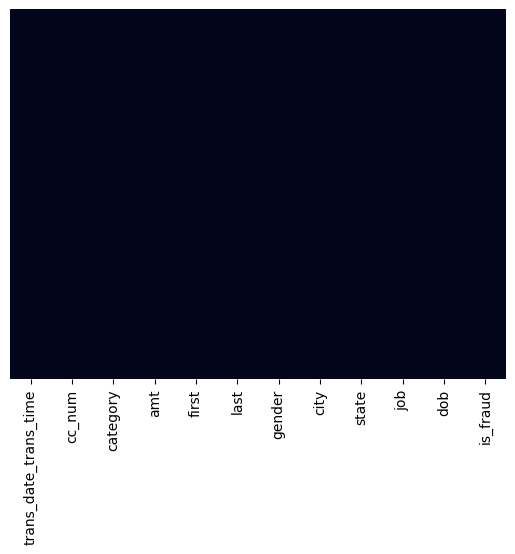

In [10]:
#Checking for missing values
sns.heatmap(cc_train.isnull(), yticklabels=False, cbar=False)

There seem to be no null values in any of the columns. Hence, there's no need for imputation.
##### *Now, I'll be addressing each feature one at a time for final analysis. I'll also be adding some addition features in the process if necessary.*

### Numerical column encoding

In [11]:
type(cc_train['trans_date_trans_time'])

pandas.core.series.Series

In [12]:
#Converting 'trans_date_trans_time' column to pandas DateTime/TimeStamp object.
cc_train['trans_date_trans_time'] = pd.to_datetime(cc_train['trans_date_trans_time'])
cc_test['trans_date_trans_time'] = pd.to_datetime(cc_test['trans_date_trans_time'])

#Inspecting the range of hours in the data
cc_train['trans_date_trans_time'].dt.hour.unique() #'.dt' is an accessor used to access datetime properties

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

##### I'll encode the transactions as follows:
- Transactions between 6AM to 1AM will be denoted by '0' representing typical transactions.
- Transactions between 1AM to 6AM will be denoted by '1' representing unusual transactions.

*Note: I've selected these timings considering that individuals in our generation tend to stay up late at night which makes the 9PM to 12AM an important time duration to consider being typical.*

### Transaction Hour Encoding

In [13]:
#Function for hours encoding
def hour_encoder(hour):
    if 1 <= hour <= 6: #Unusual hours
        return 1
    else:
        return 0

In [14]:
#Applying the encoding function
cc_train['trans_hour'] = cc_train['trans_date_trans_time'].dt.hour.apply(hour_encoder)
cc_test['trans_hour'] = cc_test['trans_date_trans_time'].dt.hour.apply(hour_encoder)

### Categorical column encoding
There are various categorial columns that must be encoded into numerical values as algorithms require numerical inputs.

#### The 'gender' column
I'll represent Male as '0' and Female as '1'.

In [15]:
cc_train['gender'].unique()

array(['F', 'M'], dtype=object)

In [16]:
#Creating a dictionary to define the mapping/encoding of the genders
map_genders = {'M': 0, 'F': 1}

#Applying the '.map' function
cc_train['gender_encoded'] = cc_train['gender'].map(map_genders)
cc_test['gender_encoded'] = cc_test['gender'].map(map_genders)

#Dropping the old gender column
cc_train.drop('gender', inplace=True, axis=1)
cc_test.drop('gender', inplace=True, axis=1)
cc_train['gender_encoded']

0          1
1          1
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: gender_encoded, Length: 1296675, dtype: int64

#### The 'dob' column
Although not useful for the algorithm in my opinion as a model won't necessarily comprehend what these dates have to do with frauds, this data is definitely useful for visualization. Hence, I'll convert it into the pandas Date and time object type to extract the ages of the card holders.

In [17]:
#Converting 'dob' column to pandas DateTime/TimeStamp object
cc_train['dob'] = pd.to_datetime(cc_train['dob'])
cc_test['dob'] = pd.to_datetime(cc_test
                                ['dob'])
#Extracting the ages from the column
cc_train['age'] = (datetime.now() - cc_train['dob']).dt.days//365
cc_test['age'] = (datetime.now() - cc_test['dob']).dt.days//365
#The double forward slash (//) performs floor division.
#Result: The largest integer less than equal to the result of division.

#Dropping the dob column
cc_train.drop('dob', inplace = True, axis = 1)
cc_test.drop('dob', inplace = True, axis = 1)
cc_train['age']

0          35
1          45
2          62
3          57
4          37
           ..
1296670    62
1296671    44
1296672    56
1296673    43
1296674    28
Name: age, Length: 1296675, dtype: int64

In [18]:
cc_train.head(n=2)

,trans_date_trans_time,cc_num,category,amt,first,last,city,state,job,is_fraud,trans_hour,gender_encoded,age
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,Jennifer,Banks,Moravian Falls,NC,"Psychologist, counselling",0,0,1,35
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,Stephanie,Gill,Orient,WA,Special educational needs teacher,0,0,1,45


#### The 'category', 'city', 'state' and 'job' columns
I'll be using Weight Of Evidence (WOE) encoding, a statistical technique often used in credit scoring. It will transform categorical variables into numerical representations, which are necessary for algorithms to comprehend so that they're able to effectively capture the relationship between them and the target variables.

In [19]:
def woe(df, columns, dep_col):
    woe = WOEEncoder()
    for col in columns:
        
        X = df[col]
        y = dep_col #Accessing the dependent variable as strings instead of series

        #Dynamically generating columnn names
        col_name = f"{col}_WOE"
        df[col_name] = woe.fit_transform(X,y)
        
    return df

In [20]:
#Defining the columns to encode and the target variable
columns_to_encode = ['category', 'city', 'state', 'job']
dep_col = 'is_fraud'

woe(cc_train, columns_to_encode, cc_train[dep_col])
woe(cc_test, columns_to_encode, cc_test[dep_col])
cc_train.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'first', 'last',
       'city', 'state', 'job', 'is_fraud', 'trans_hour', 'gender_encoded',
       'age', 'category_WOE', 'city_WOE', 'state_WOE', 'job_WOE'],
      dtype='object')

##### Categorical columns encoding is successful however, I won't drop the original columns as they will be useful for visualization.

#### Additional features
I'll determine the frequencies of the transactions in the data which will be helpful to draw attention towards questionable sudden spikes in the amount of transactions.

In [21]:
#Determining the range of the time period
print(f"RANGE OF THE TRANSACTION:\n\nEarliest transaction date: {cc_train['trans_date_trans_time'].dt.date.min()}")
print(f"Latest transaction date: {cc_train['trans_date_trans_time'].dt.date.max()}")

RANGE OF THE TRANSACTION:

Earliest transaction date: 2019-01-01
Latest transaction date: 2020-06-21


##### The range is about 1.5 years. I'll be storing the frequency of these transactions for every credit card on the following basis:

- Daily (1 day)
- Weekly (7 days)
- Monthly (30 days)


##### Explanation for this choice:
If a cardholder has transacted once per day, the columns would indicate '1' for example. If this has been a consistent trend for days, but then there's a sudden spike in expenditure, it might seem suspicious. However, such transactions might actually be legitimate in situations people might face such as bulk grocery shopping, discounts/sales, sudden legitimate purchases, traveling,  etc.

Hence, the per-day frequency alone doesn't really explain the whole story. Therefore, I'll be extracting weekly and monthly frequencies to include information about wider time spans as well.

In [22]:
#Daily transaction frequencies
cc_train['daily_trans_freq'] = cc_train.groupby(['cc_num', cc_train['trans_date_trans_time'].dt.date])['trans_date_trans_time'].transform('size').fillna(0, downcast='int')
cc_test['daily_trans_freq'] = cc_test.groupby(['cc_num', cc_test['trans_date_trans_time'].dt.date])['trans_date_trans_time'].transform('size').fillna(0, downcast='int')

#Weekly transaction frequencies
cc_train['weekly_trans_freq'] = cc_train.groupby(['cc_num', cc_train['trans_date_trans_time'].dt.to_period('W')])['trans_date_trans_time'].transform('size').fillna(0, downcast='int')
cc_test['weekly_trans_freq'] = cc_test.groupby(['cc_num', cc_test['trans_date_trans_time'].dt.to_period('W')])['trans_date_trans_time'].transform('size').fillna(0, downcast='int')

#Monthly transaction frequencies
cc_train['monthly_trans_freq'] = cc_train.groupby(['cc_num', cc_train['trans_date_trans_time'].dt.to_period('M')])['trans_date_trans_time'].transform('size').fillna(0, downcast='int')
cc_test['monthly_trans_freq'] = cc_test.groupby(['cc_num', cc_test['trans_date_trans_time'].dt.to_period('M')])['trans_date_trans_time'].transform('size').fillna(0, downcast='int')

cc_train.head(n=3)

,trans_date_trans_time,cc_num,category,amt,first,last,city,state,job,is_fraud,trans_hour,gender_encoded,age,category_WOE,city_WOE,state_WOE,job_WOE,daily_trans_freq,weekly_trans_freq,monthly_trans_freq
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,Jennifer,Banks,Moravian Falls,NC,"Psychologist, counselling",0,0,1,35,0.924914,-2.469513,-0.156457,-1.080186,3,14,98
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,Stephanie,Gill,Orient,WA,Special educational needs teacher,0,0,1,45,0.898799,-3.027790,-0.122657,-0.904144,10,40,139
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,Edward,Sanchez,Malad City,ID,Nature conservation officer,0,0,0,62,-0.847622,-1.076791,-0.988155,1.120434,1,5,22


##### I'm retaining the 'trans_date_trans_time' column as it'll be useful during EDA.

## Feature Scaling

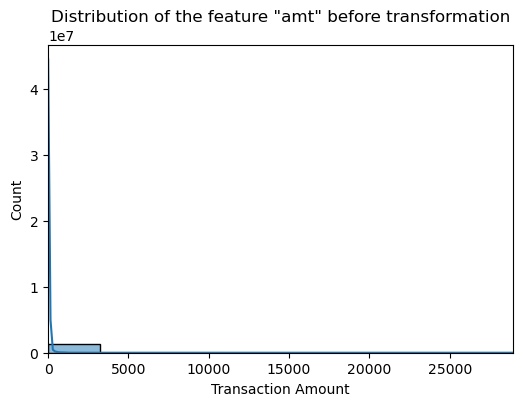

Text(0.5, 1.0, 'Studying the Normality')

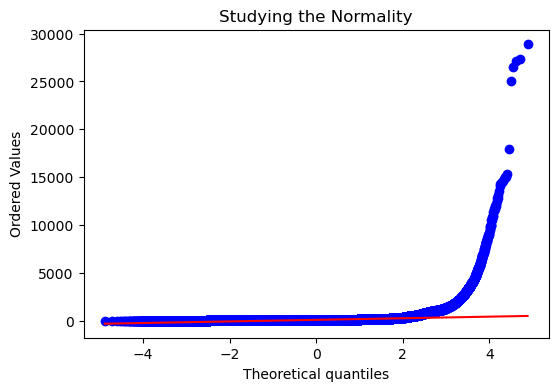

In [23]:
#Visual inspection of the 'amt' column

#Histogram
plt.figure(figsize=(6,4))
sns.histplot(cc_train['amt'], bins=9, kde=True)
plt.xlim(0, cc_train['amt'].max())
plt.xlabel('Transaction Amount')
plt.title('Distribution of the feature "amt" before transformation')
plt.show()

#Checking normality with Q-Q (Quantile-Quantile) plot
plt.figure(figsize=(6,4))
ax1 = plt.subplot(1, 1, 1)
stats.probplot(cc_train['amt'], dist=stats.norm, plot=ax1)
ax1.set_title(f"Studying the Normality")

In [24]:
#Statistics
print(f"Standard Deviation: {cc_train['amt'].std():.2f}")
print(f"Skewness: {cc_train['amt'].skew():.2f}")

Standard Deviation: 160.32
Skewness: 42.28


#### Key takeaways from the plots and statistics:
- A severely right-skewed (positive) distribution.
- Outliers consisting of larger transaction amounts.
- A high degree of variability/dispersion in the values again, majorly due to outliers.
- A Non-Gaussian/Normal Distribution.

##### I'll use log transformation over the 'amt' column to tackle the right skewness and to normalize the data as MinMax Normalization is sensitive to outliers and Z-Score Normalization isn't as effective in handling outliers as compared to log transformation.

In [25]:
#Log Transformation
cc_train['amt_log'] = np.log1p(cc_train['amt'])
cc_test['amt_log'] = np.log1p(cc_test['amt'])

#Removing the 'amt' column
cc_train.drop('amt', inplace=True, axis=1)
cc_test.drop('amt', inplace=True, axis=1)

##### Now I'll Visualize the results to study what's changed.

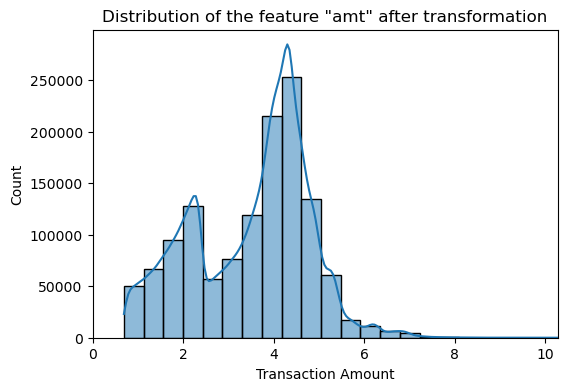

Text(0.5, 1.0, 'Studying the Normality after transformation')

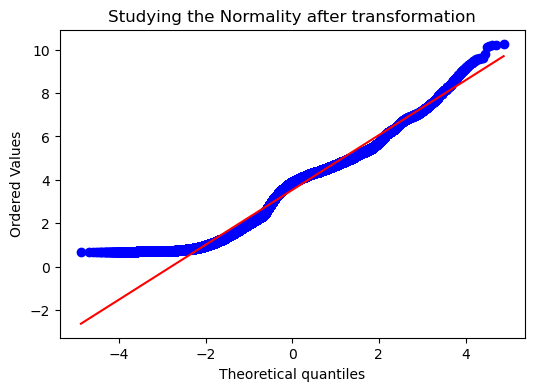

In [26]:
# Visual Inspection after transforming the column

#Histogram
plt.figure(figsize=(6,4))
sns.histplot(cc_train['amt_log'], bins=22, kde=True)
plt.xlim(0, cc_train['amt_log'].max())
plt.xlabel('Transaction Amount')
plt.title('Distribution of the feature "amt" after transformation')
plt.show()

#Checking normality with Q-Q (Quantile-Quantile) plot
plt.figure(figsize=(6,4))
ax1 = plt.subplot(1, 1, 1)
stats.probplot(cc_train['amt_log'], dist=stats.norm, plot=ax1)
ax1.set_title(f"Studying the Normality after transformation")

In [27]:
#Statistics after transformation
print(f"Mean: {cc_train['amt_log'].mean():.2f}")
print(f"Standard Deviation: {cc_train['amt_log'].std():.2f}")
print(f"Skewness: {cc_train['amt_log'].skew():.2f}")

Mean: 3.53
Standard Deviation: 1.29
Skewness: -0.30


##### Observations after the transformation:
- The resulting data appears significantly improved.
- A great  amount of normality has been achieved although it's still not perfect.
- While outliers persist, they might represent fraudulent or unusually large yet genuine transactions. Despite trying other methods, I couldn't completely supress them. To prevent information loss, I will proceed with the analysis keeping them as they represent real world data.

### Target column class balancing
I'll inspect the balance of the classes in the target variable and balance them if necessary to avoid bias and overfitting.

In [28]:
#Storing and inspecting the value count of the target column before balanicngofofre oo
y_train_count = cc_train['is_fraud'].value_counts()
y_train_count

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

##### Values in Class '1' (fraudulent transactions) are significantly lesser compared to class '0' (genuine transactions) which suggests a major imbalance in the target column. I'll use SMOTE (Synthetic Minority Over-sampling Technique) to tackle the class inbalance.

In [29]:
X_train = cc_train.drop(['is_fraud', 'category', 'city', 'state', 'job', 'trans_date_trans_time', 'first', 'last'], axis=1)
X_test = cc_test.drop(['is_fraud', 'category', 'city', 'state', 'job', 'trans_date_trans_time', 'first', 'last'], axis=1)

y_train = cc_train['is_fraud']
y_test = cc_test['is_fraud']

#Undersampling the majority class
rus = RandomUnderSampler(sampling_strategy = 'auto', random_state = 59)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

#Oversampling the minority class
#smote = SMOTE(random_state = 97)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)

# Note

In [30]:
print(f"VALUE COUNT OF SENTIMENTS\nBefore balancing:\n{y_train_count}\n\nAfter balancing:\n{y_train_resampled.value_counts()}")

VALUE COUNT OF SENTIMENTS
Before balancing:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

After balancing:
is_fraud
0    7506
1    7506
Name: count, dtype: int64


##### The count of values for each class in the target column is now equal. This will assure that the algorithms don't happen to develop a bias toward any specific class and helps prevent overfitting.

In [31]:
print(f"{X_train_resampled.shape}{y_train_resampled.shape}")

(15012, 12)(15012,)


### Feature Selection
I'll use the Boruta algorithm, a feature selection algorithm that works in tandem with the Random Forest Classifier which is quite robust to overfitting, so this combination is perfect for feature selection. The Boruta algorithm works by ranking the features based on how they impact the model.

In [32]:
#Initializing RandomForest and then creating an instance for Boruta algorithm
rf = RandomForestClassifier(random_state=47, max_depth=5, n_jobs=-1)
bor = BorutaPy(rf, n_estimators="auto", random_state=50)

#Boruta algorithm package happens to not work with Numpy functions 'numpy.int', 'np.float64' and 'np.bool_'.
#This ensures that those old functions aren't used
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

boruta_algo = bor.fit(X_train_resampled.values, y_train_resampled)

#Creating lists for the results of Boruta (Important and weak/uncertain features)
imp_feat = np.array(X_train_resampled.columns)[bor.support_].tolist()
weak_feat = np.array(X_train_resampled.columns)[bor.support_weak_].tolist()

#Prinitng the results
print(f"FEATURES SELECTED:\n{imp_feat}\n\nFeatures Boruta is uncertain about:\n{weak_feat}")

FEATURES SELECTED:
['cc_num', 'trans_hour', 'gender_encoded', 'age', 'category_WOE', 'city_WOE', 'state_WOE', 'job_WOE', 'daily_trans_freq', 'weekly_trans_freq', 'monthly_trans_freq', 'amt_log']

Features Boruta is uncertain about:
[]


#### Observation:
Boruta algorith has considered all the features as being important. Being a binary feature selection algorithm, it didn't help in interpreting the ranking of the features.

#### Solution:
I'll use Random Forest Classifer's 'feature_importances_' attribute  alone for feature selection and visualization of the importance of the features.

In [33]:
#Random Forest for feature selection
rf.fit(X_train_resampled, y_train_resampled)
impt = rf.feature_importances_

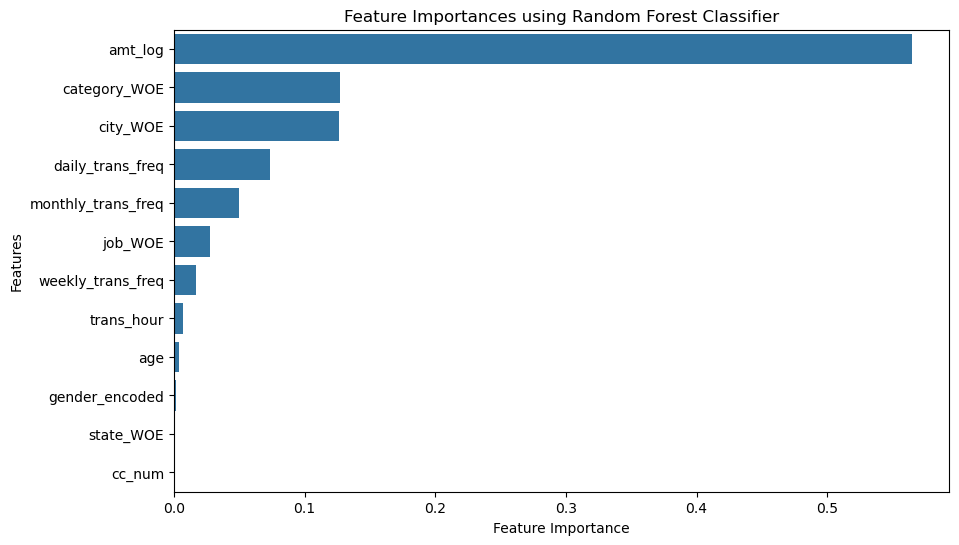

In [34]:
impt_ser = pd.Series(impt, index = X_train_resampled.columns)

#Visualizing the result
plt.figure(figsize=(10, 6))
sns.barplot(x=impt_ser.sort_values(ascending=False).values, y=impt_ser.sort_values(ascending=False).index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances using Random Forest Classifier")
plt.show()

#### Conclusion:
This turned out to be much better for interpretability! I stated much earlier, during the 'dob' column encoding stage that in my opinion, it might not really be useful for the model, and it turned out to be true as depicted in this Bar chart. I'll consider columns including **'trans_hour' and those above it**, as they are more likely to have some degree of contribution to the model.

In [35]:
X_train_resampled = X_train_resampled.drop(['gender_encoded', 'age', 'state_WOE'], axis=1)
X_test = X_test.drop(['gender_encoded', 'age', 'state_WOE'], axis=1)

### Inspecting Correlation
I'll plot a correlation heatmap in order to study if any of the columns are strongly correlated and try to eliminate such cases.

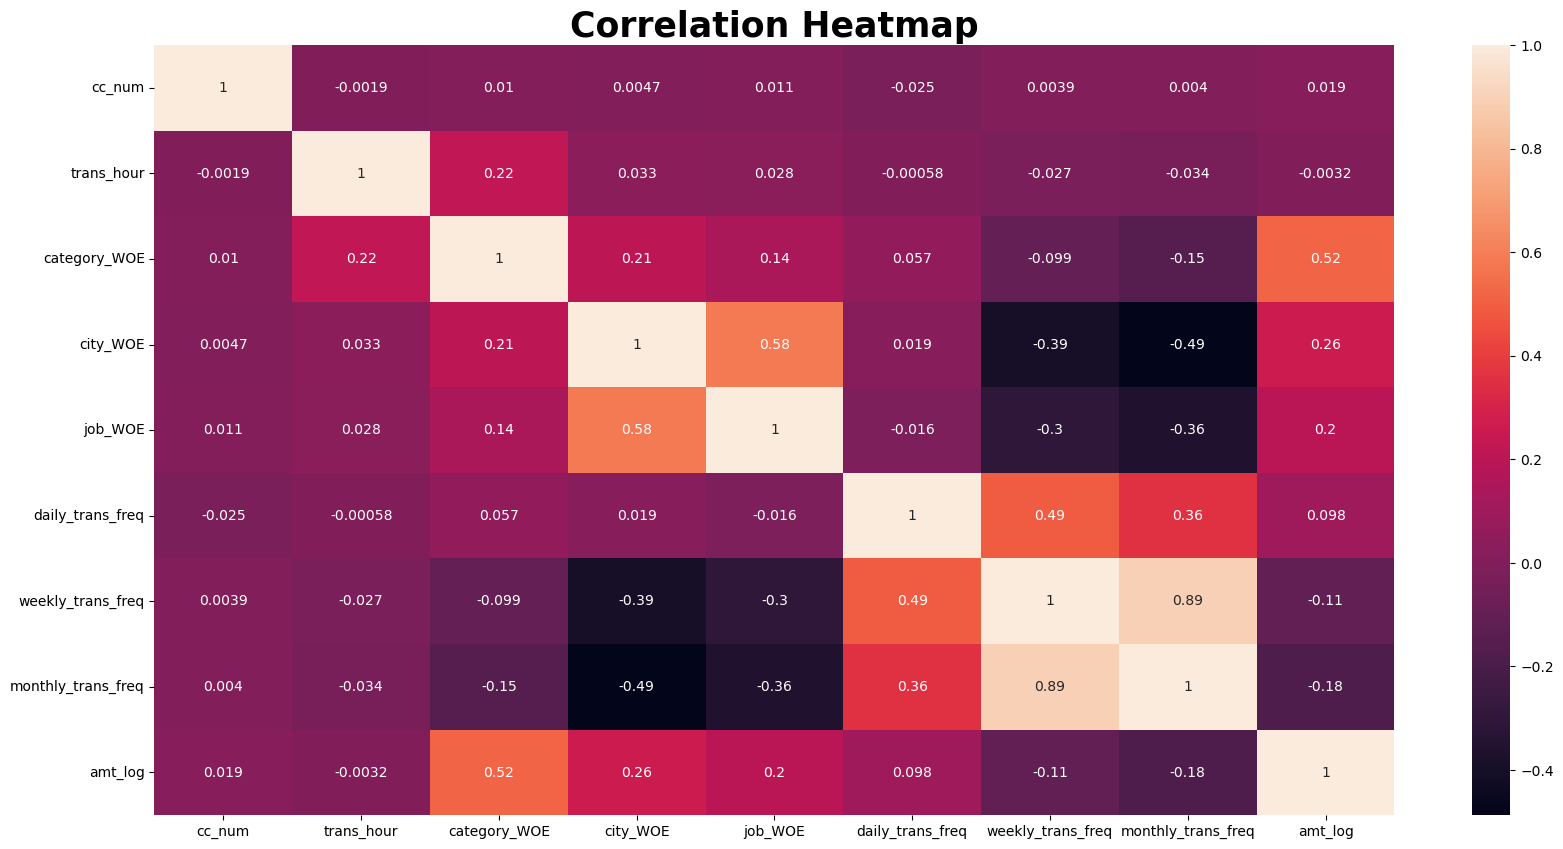

In [36]:
#Correlation Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(X_train_resampled.corr(),annot=True)
plt.title('Correlation Heatmap', fontweight='bold', size=25)
plt.show()

In [37]:
#Inspecting the correlation of variables with the target varibale
X_train_resampled.corrwith(y_train).abs().sort_values(ascending=False)

amt_log               0.577364
category_WOE          0.411153
city_WOE              0.404580
job_WOE               0.297210
monthly_trans_freq    0.272583
daily_trans_freq      0.195785
weekly_trans_freq     0.150742
trans_hour            0.091243
cc_num                0.000362
dtype: float64

#### Observation:
- The "city_WOE" as well as the 'job_WOE" columns have a strong neagtive correlation with the columns "weekly_trans_freq" and "monthly_trans_freq".
- The "city_WOE" and 'job_WOE" are correlated as well.
- The "category_WOE" column has a strong coorelation with "amt"log" column.
- The  "daily_trans_freq", "weekly_trans_freq" and "monthly_trans_freq" have a really strong degree of correlation with one another.
- Among the transaction frequency columns, the "montly_trans_freq" is the most correlated with the target variable which makes it more desirable than the other two.
#### Solution:
- I'll remove the columns "daily_trans_freq", "weekly_trans_freq", "category_WOE" and "job_WOE" and see if the result is any better.

In [38]:
X_train_cleaned = X_train_resampled.drop(["daily_trans_freq", "weekly_trans_freq", "category_WOE", "job_WOE"], axis=1)
X_test = X_test.drop(["daily_trans_freq", "weekly_trans_freq", "category_WOE", "job_WOE"], axis=1)

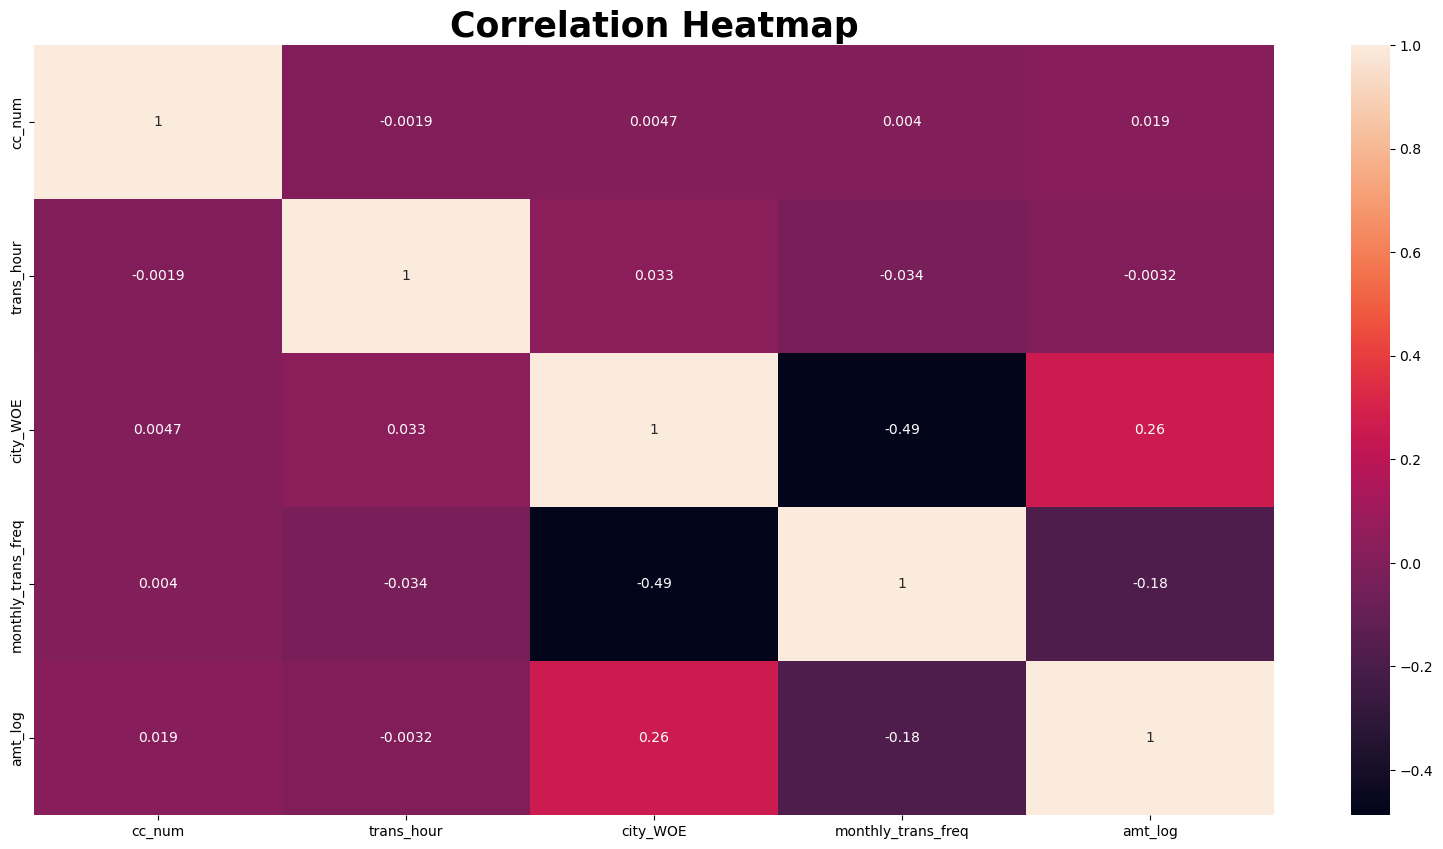

In [39]:
#Correlation Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(X_train_cleaned.corr(),annot=True)
plt.title('Correlation Heatmap', fontweight='bold', size=25)
plt.show()

##### Most values now are situated around the 0.3 mark. Some are positive while the others are negative. This indicates the present a diversity in variables without any of them being strongly related.

### Standardization

In [40]:
#scaler = StandardScaler()
#scaler.fit(X_train_cleaned)
#X_train_std = scaler.transform(X_train_cleaned)
#X_test_std = scaler.transform(X_test)

Note: Upon further evaluation, I learnt that the algorithms perform better without using StandardScaler. Hence I'm excluding the same.

#### Saving the processed data

In [41]:
#Saving X_train
with open('X_train', 'wb') as file:
    pickle.dump(X_train_cleaned, file)

#Saving y_train
with open('y_train', 'wb') as file:
    pickle.dump(y_train_resampled, file)

#Saving X_test
with open('X_test', 'wb') as file:
    pickle.dump(X_test, file)

#Saving y_test
y_test = cc_test['is_fraud']
with open('y_test', 'wb') as file:
    pickle.dump(y_test, file)

# Stage 3: EXPLORATORY DATA ANALYSIS (EDA) <a id="section-four"></a>
##### Objective:
- Studying the characteristics of the data through various visualizations.

### Transaction Category Distribution

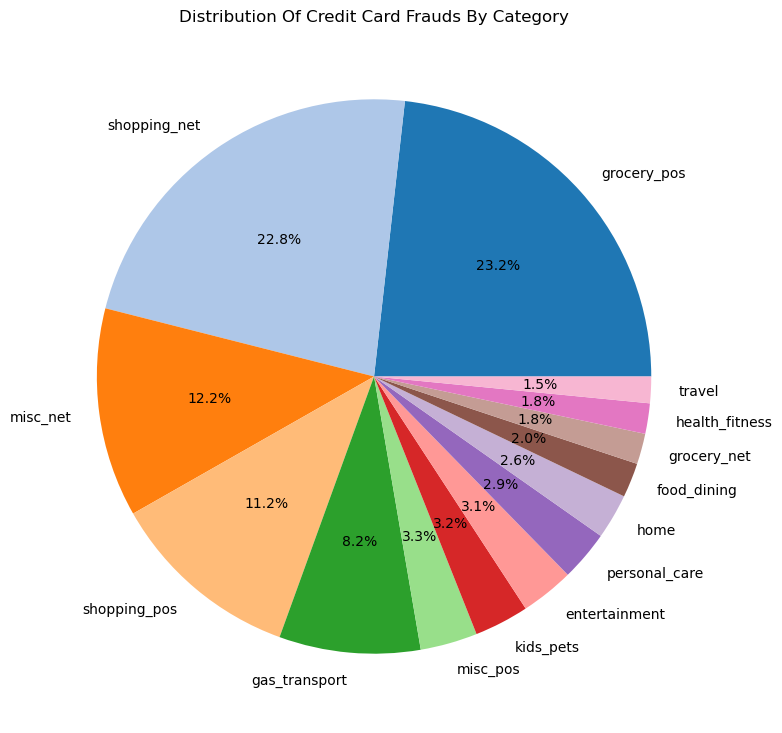

In [42]:
categories = cc_train[cc_train['is_fraud']==1]['category'].value_counts()

#Pie Chart
plt.figure(figsize=(9,9))
sns.set_palette('tab20')
plt.pie(categories, labels = categories.index, autopct = '%1.1f%%')
plt.title('Distribution Of Credit Card Frauds By Category')
plt.show()

##### Observation:
Most of the Credit Card-related frauds appear to have occurred primarily due to online shopping, grocery purchases, and miscellaneous charges.

### Gender Distribution

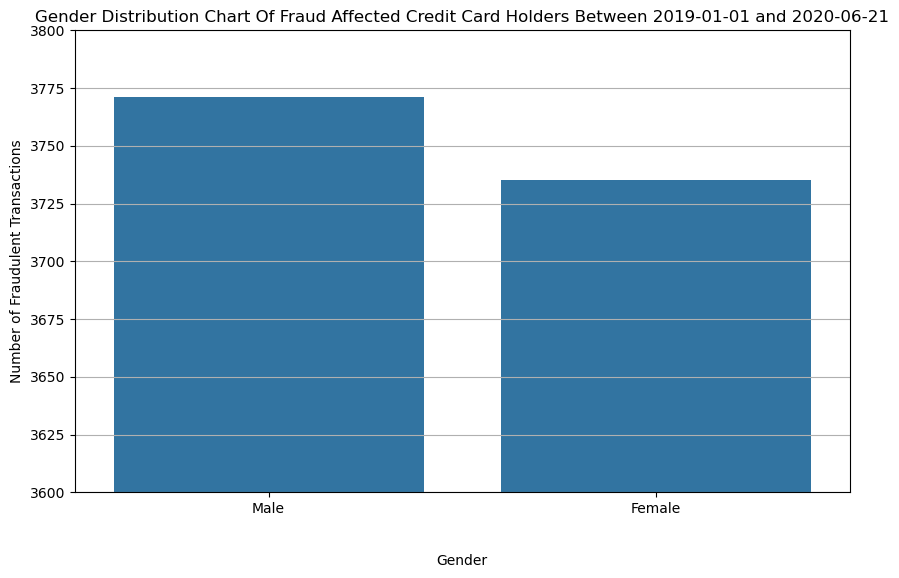

In [43]:
fraud_gen = cc_train[cc_train['is_fraud'] == 1]['gender_encoded'].value_counts()

#Gender Distribution Chart
plt.figure(figsize=(10,6))
gender = sns.barplot(x=fraud_gen.index, y=fraud_gen.values)
plt.xticks(ticks=[1, 0], labels=['Female', 'Male'])
plt.xlabel('\n\nGender')
plt.ylabel('Number of Fraudulent Transactions')
plt.title("Gender Distribution Chart Of Fraud Affected Credit Card Holders Between 2019-01-01 and 2020-06-21")
plt.grid(axis='y', linestyle='-')
plt.ylim(3600,3800)
plt.show()

##### Observation:
This comparison suggest that the Male population is somewhat more prone to fraudulent Credit Card transactions.

### Age Distribution

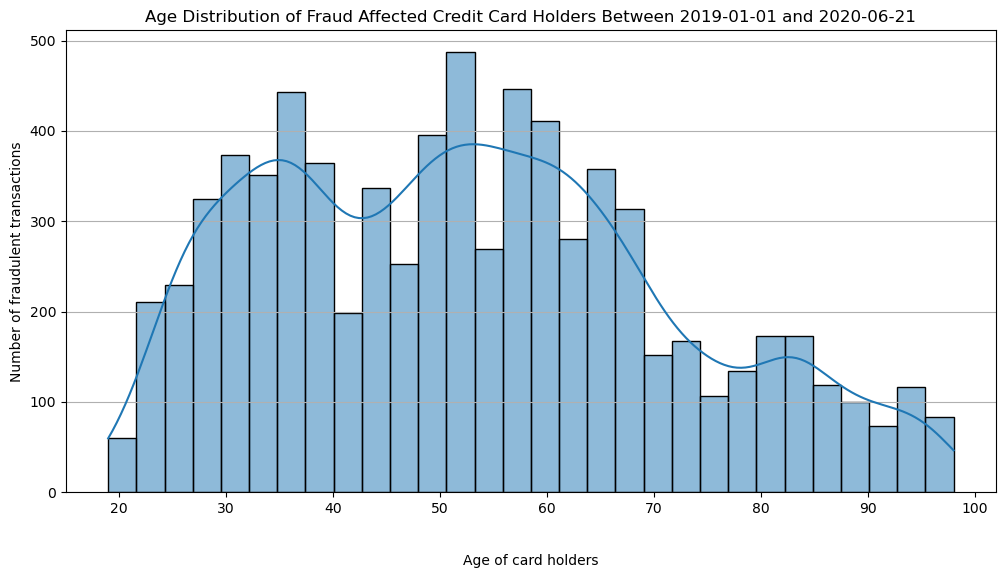

In [44]:
age = cc_train[cc_train['is_fraud'] == 1]['age'].values

plt.figure(figsize=(12,6))
sns.histplot(age, bins=30, kde=True)
plt.xlabel('\n\nAge of card holders')
plt.ylabel('Number of fraudulent transactions')
plt.title('Age Distribution of Fraud Affected Credit Card Holders Between 2019-01-01 and 2020-06-21')
plt.grid(axis='y', linestyle='-')
plt.show()

##### Observation:
It seems that individuals around the age of 50 are the most prone to credit card fraud, while the count decreases among people older than 60. Additionally, the age group of students and younger working individuals, i.e., those in their 20s and 30s, also appear to own credit cards and be affected by fraud to a similar extent as those in their 60s. There doesn't appear to be a particular trend in this data, suggesting that at least during this time period, there may not have been frauds specifically targeted at a particular age group.

### Occupations with the most fraudulent transactions

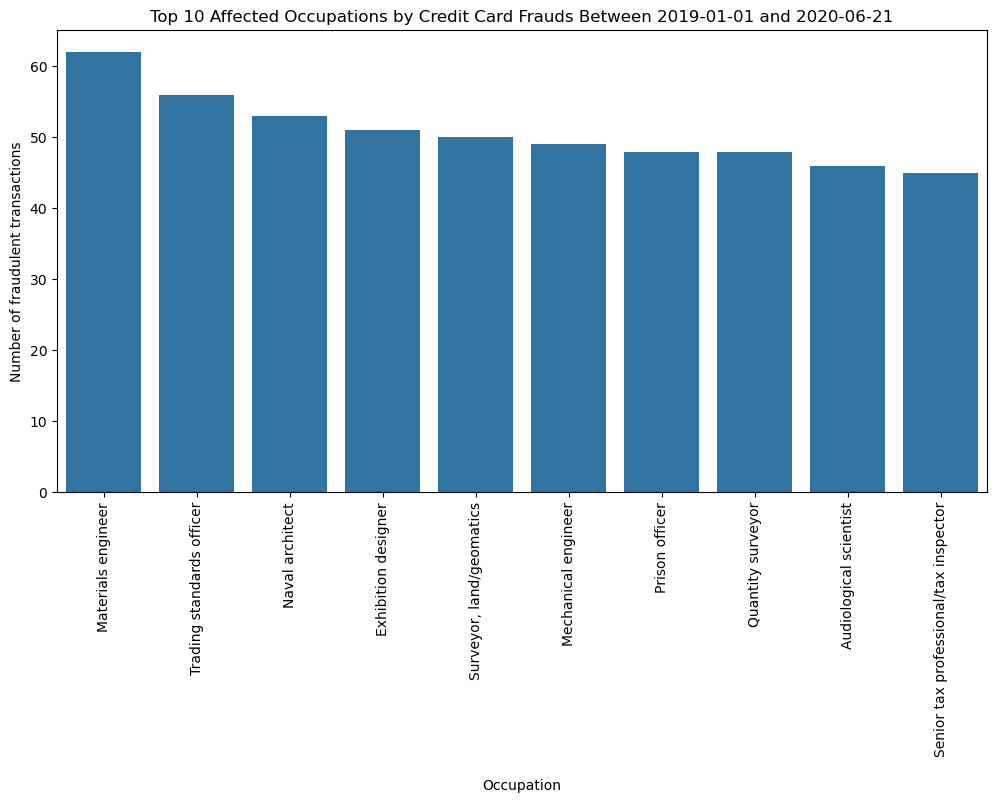

In [45]:
occup = cc_train[cc_train['is_fraud'] == 1]['job'].value_counts().head(n=10)

plt.figure(figsize=(12,6))
sns.barplot(x=occup.index, y=occup.values)
plt.xlabel('\nOccupation')
plt.xticks(rotation=90)
plt.ylabel('Number of fraudulent transactions')
plt.title('Top 10 Affected Occupations by Credit Card Frauds Between 2019-01-01 and 2020-06-21')
plt.show()

##### Observation:
Most people affected by fraud were working as Materials Engineers, Trading Standards Officers, Naval Architects and others as depicted above. This suggests a trend wherein individuals engaged in purchase sectors are more prone to frauds.

### Occupations not/least affected by fraudulent transactions

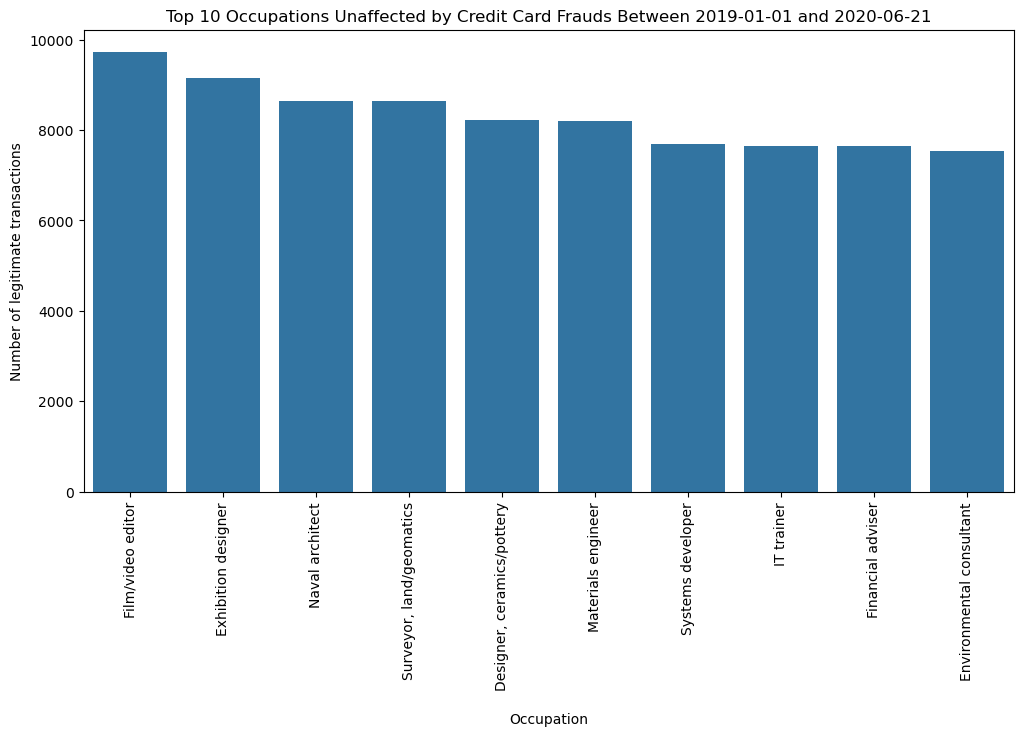

In [46]:
occup = cc_train[cc_train['is_fraud'] == 0]['job'].value_counts().head(n=10)

plt.figure(figsize=(12,6))
sns.barplot(x=occup.index, y=occup.values)
plt.xlabel('\nOccupation')
plt.xticks(rotation=90)
plt.ylabel('Number of legitimate transactions')
plt.title('Top 10 Occupations Unaffected by Credit Card Frauds Between 2019-01-01 and 2020-06-21')
plt.show()

##### Observations:
- The majority of unaffected occupations appear to include film/video editing, exhibition designing surveying and others as depicted above.
- Surprisingly, Naval Architecture appears in here as well, suggesting that individuals in this occupation engage in numerous credit card transactions, making it a risky sector for individuals. Those in this profession must ensure they make purchases from trusted sources.

### Trend Of Fraudulent Transactions On Hourly Basis

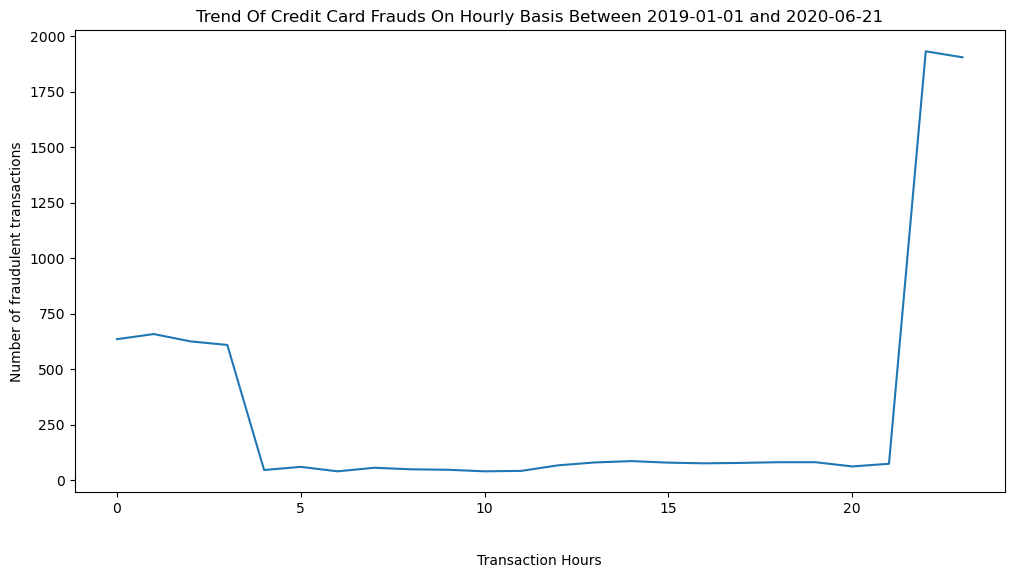

In [47]:
hours = cc_train[cc_train['is_fraud'] == 1]['trans_date_trans_time'].dt.hour.value_counts().sort_values(ascending=True)

#LinePlot
plt.figure(figsize=(12,6))
sns.lineplot(x=hours.index, y=hours.values)
plt.xlabel('\n\nTransaction Hours')
plt.ylabel('Number of fraudulent transactions')
plt.title('Trend Of Credit Card Frauds On Hourly Basis Between 2019-01-01 and 2020-06-21')
plt.show()

##### Observation:
It appears that the majority of fraudulent transactions occur during the hours between dusk and dawn while during the day, the amount of fraudulent transactions are negligible.

### Trend Of Fraudulent Transactions On Daily Basis

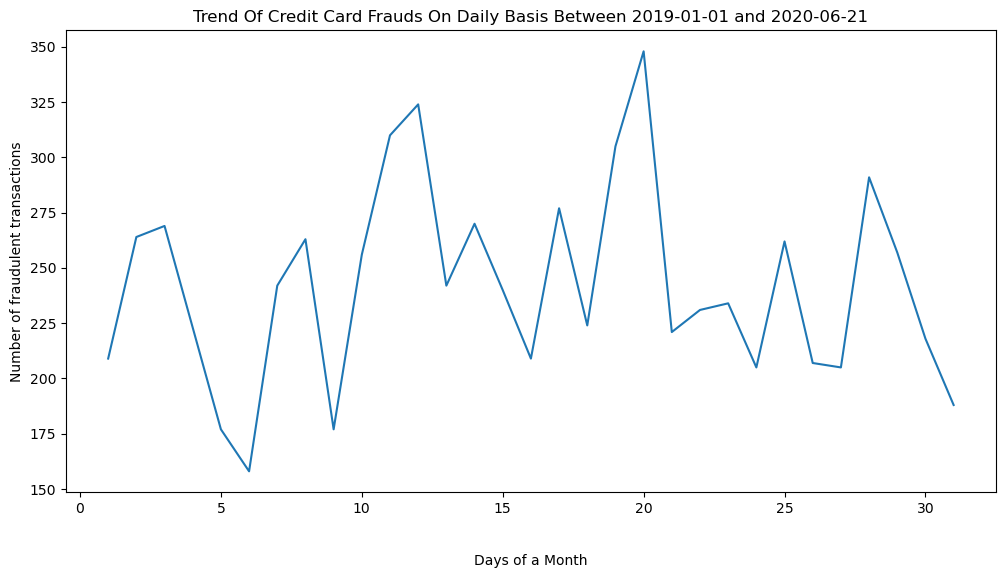

In [48]:
day = cc_train[cc_train['is_fraud'] == 1]['trans_date_trans_time'].dt.day.value_counts().sort_values(ascending=True)

#LinePlot
plt.figure(figsize=(12,6))
sns.lineplot(x=day.index, y=day.values)
plt.xlabel('\n\nDays of a Month')
plt.ylabel('Number of fraudulent transactions')
plt.title('Trend Of Credit Card Frauds On Daily Basis Between 2019-01-01 and 2020-06-21')
plt.show()

##### Observation:
It appears that the amount of fraudulent transactions peak about 20 days into the months. However, despite this observed pattern, there is no discernible trend or pattern to address in relation to these occurrences.

### Trend Of Fraudulent Transactions On Monthly Basis

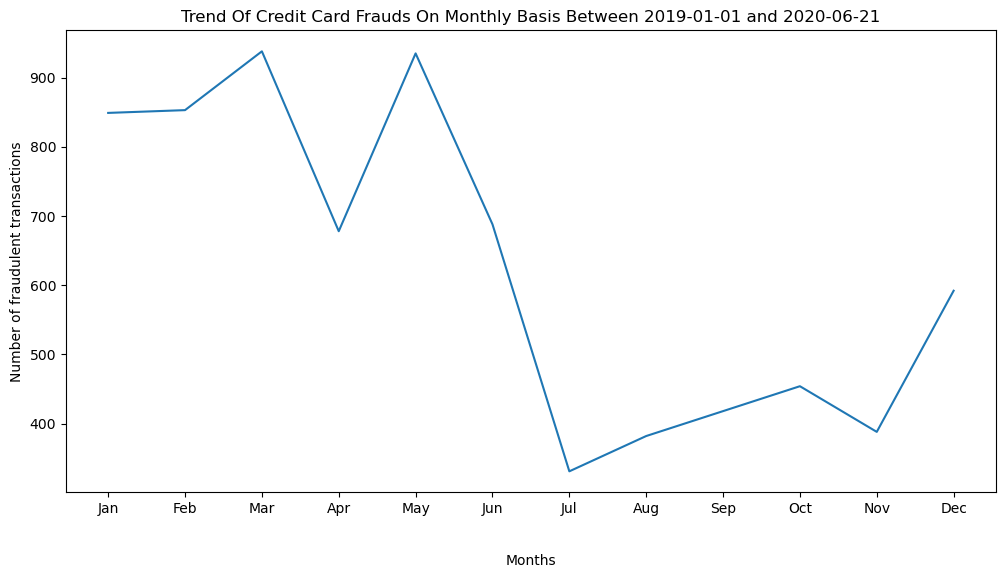

In [49]:
month = cc_train[cc_train['is_fraud'] == 1]['trans_date_trans_time'].dt.month.value_counts().sort_values(ascending=True)

#LinePlot
plt.figure(figsize=(12,6))
sns.lineplot(x=month.index, y=month.values)
plt.xlabel('\n\nMonths')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Number of fraudulent transactions')
plt.title('Trend Of Credit Card Frauds On Monthly Basis Between 2019-01-01 and 2020-06-21')
plt.show()

##### Observation:
It appears that the majority of fraudulent transactions take place during the first two quarters of the year, followed by a significant decline. However, they gradually rise again thereafter.

### States with the most fraudulent transactions

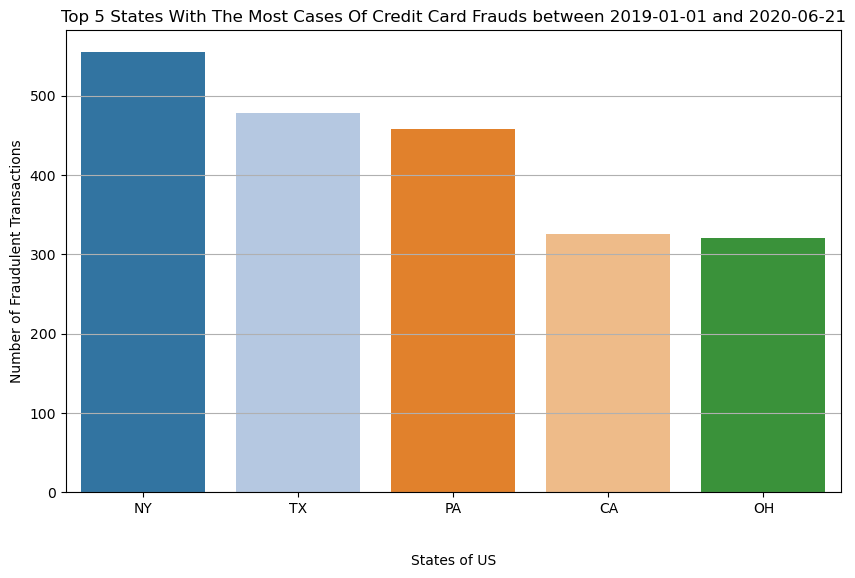

In [50]:
most_fraud_st = cc_train[cc_train['is_fraud'] == 1]['state'].value_counts().head(n=5)

#Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x=most_fraud_st.index, y=most_fraud_st.values, hue=most_fraud_st.index)
plt.title('Top 5 States With The Most Cases Of Credit Card Frauds between 2019-01-01 and 2020-06-21')
plt.xlabel('\n\nStates of US')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(axis='y', linestyle='-')
plt.show()

##### Observation:
The Credit Card holders residing in the states of New York, Texas, Pennsylvania etc to be the most affected by fraudulent transactions.

### Cities with the most fraudulent transactions

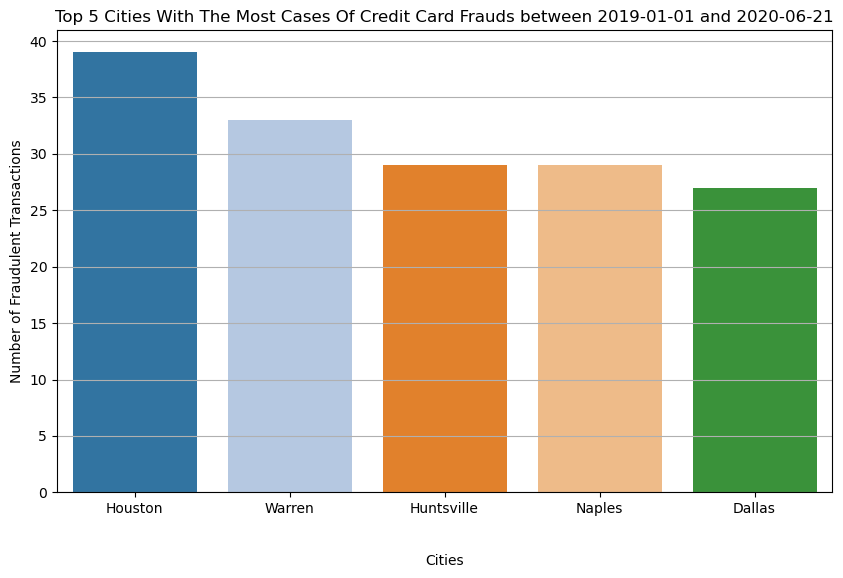

In [51]:
most_fraud = cc_train[cc_train['is_fraud'] == 1]['city'].value_counts().head(n=5)

#Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x=most_fraud.index, y=most_fraud.values, hue=most_fraud.index)
plt.title('Top 5 Cities With The Most Cases Of Credit Card Frauds between 2019-01-01 and 2020-06-21')
plt.xlabel('\n\nCities')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(axis='y', linestyle='-')
plt.show()

##### Observation:
The Credit Card holders residing in the cities Houston, Warren, Huntsville etc appear to be the most affected by fraudulent transactions.

### Most affected Credit Cards

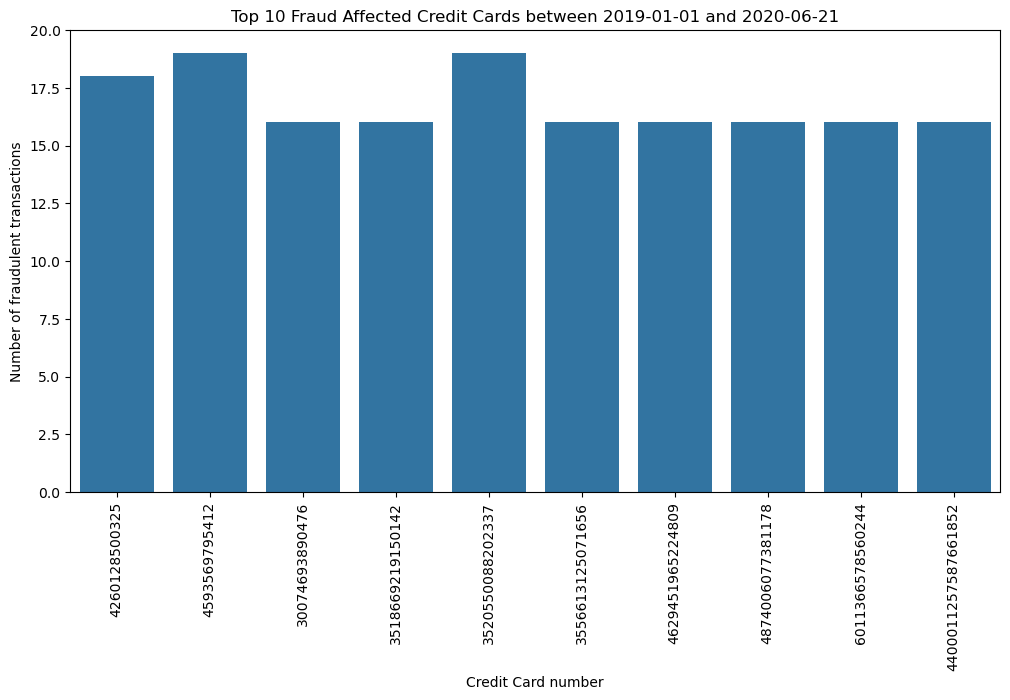

In [52]:
cc_most = cc_train[cc_train['is_fraud']==1]['cc_num'].value_counts().head(n=10)

plt.figure(figsize=(12,6))
sns.barplot(x=cc_most.index, y=cc_most.values)
plt.xlabel('Credit Card number')
plt.xticks(rotation=90)
plt.ylabel('Number of fraudulent transactions')
plt.ylim(0,20)
plt.title('Top 10 Fraud Affected Credit Cards between 2019-01-01 and 2020-06-21')
plt.show()

##### Observation:
The graph above depicts the credit cards most affected by fraud. The high number of fraudulent transactions in such a short period of time suggests that individuals need to transact wisely, check their card statements frequently, and report suspicious activities to their banks. They must also refrain from transacting where they were previously deceived, if applicable.

### Basic details about the top 10 most affected Credit Card holders

In [53]:
cc_train.loc[cc_train['cc_num'].isin(cc_most.index.tolist()), ['first', 'last', 'gender_encoded',
                                                               'age', 'cc_num', 'state', 'city','job']].drop_duplicates()

,first,last,gender_encoded,age,cc_num,state,city,job
6,Kelsey,Richards,1,30,30074693890476,KS,Holcomb,Arboriculturist
298,Marissa,Powell,1,43,4400011257587661852,NE,North Loup,"Nurse, children's"
776,Jose,Vasquez,0,24,3556613125071656,TX,Lake Jackson,Futures trader
1054,Micheal,Walters,0,22,3520550088202337,MN,Hovland,Freight forwarder
1323,Adam,Stark,0,26,6011366578560244,PA,Mc Veytown,Nutritional therapist
1386,Dorothy,Thomas,1,27,3518669219150142,OH,Milford,Hospital doctor
1577,Karen,Warren,1,26,4629451965224809,GA,Hahira,"Teacher, special educational needs"
2676,Whitney,Gallagher,1,26,4260128500325,KY,Deane,"Conservation officer, historic buildings"
4625,Patricia,Russell,1,34,4874006077381178,IA,Moscow,Chief Technology Officer
93528,Chelsea,Silva,1,27,4593569795412,NE,Hubbell,Set designer


#### Conclusion:
The above data analysis can serve as a stepping stone to attempt to identify patterns in Credit Card-related frauds and to address their root causes with the assistance of respective authorities. The basic information of the most affected Credit Card holders can be utilized to survey them, if necessary, which might aid in discerning the most frequent sources of these frauds.

# Stage 4: MODEL BUILDING AND TRAINING <a id="section-five"></a>
##### Objectives:
- Model Building:
    - Splitting the data into train and validation sets
    - Cross Validation
    - Hyperparameter Tuning
    - Training the model
    - Calculating and setting optimal Threshold values
- Model Evaluation:
    - Confusion Matrix
    - Receiver Operating Characteristic (ROC) Curve
    - Precision Recall Curve

#### Importing saved data

In [55]:
#Loading the saved variables
with open('/Users/vedansh/Documents/Projects/Internship 1/Project 2/Saved Variables/X_train', 'rb') as file:
    X = pickle.load(file)

with open('/Users/vedansh/Documents/Projects/Internship 1/Project 2/Saved Variables/y_train', 'rb') as file:
    y = pickle.load(file)

## Model Building
Given that the data was highly imbalanced, Accuracy as a measure might be misleading. However, Recall as a metric is really crucial for this problem, as avoiding false negative cases, i.e., falsely marking fraudulent transactions as genuine, is a priority.

Hence, I'll prioritize **Recall** as a measure in this model evaluation process.

 #### Function for Model Building

In [56]:
#Model building, training and evaluation
def train_test_model(model, parameters, X, y):
    #Training and validation set
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
    
    #Cross-validation
    cv_rs = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=45)
    
    #Hyperparameter Tuning
    param_search = GridSearchCV(model, parameters, cv=cv_rs, scoring='f1', n_jobs=-1)

    #Training the model
    param_search.fit(X_train, y_train)
    tuned_model = param_search.best_estimator_
    print(f"Parameters selected by RandomizedSearchCV are:\n{param_search.best_estimator_}")
    
    #Predictions
    y_train_pred = tuned_model.predict(X_train)
    y_val_pred = tuned_model.predict(X_val)
    y_val_prob = tuned_model.predict_proba(X_val)[:, 1]
    
    #Calculating Youden's J score to determine the optimal threshold
    tn, fp, fn, tp = metrics.confusion_matrix(y_val, y_val_pred).ravel()
    j_score = ((tp/(tp+fn))+(tn/(tn+fp))) - 1
    print("." * 40)
    print(f"Optimal threshold based on Youden's J: {j_score:.2f}")
    print("." * 40)

    #Setting the calculated threshold value
    y_val_pred_thresh = (y_val_prob >= j_score).astype(int)

    #Statistical Results for Training Set
    print("\n")
    print("TRAINING SET RESULTS:")
    print("\n")
    print(f"Classification Report:\n{classification_report(y_train, y_train_pred)}")
    print("." * 55)
    print(f"Accuracy: {metrics.accuracy_score(y_train, y_train_pred):.2f}")
    print(f"Precision: {metrics.precision_score(y_train, y_train_pred):.2f}")
    print(f"Recall: {metrics.recall_score(y_train, y_train_pred):.2f}")
    print(f"F1 Score (Harmonic mean of precision and recall): {metrics.f1_score(y_train, y_train_pred):.2f}")
    print("." * 55)
    print("\n")

    #Statistical Results for Validation Set
    print("VALIDATION SET RESULTS:")
    print(f"(Threshold value: {j_score:.2f})")
    print("\n")
    print(f"Classification Report:\n{classification_report(y_val, y_val_pred_thresh)}")
    print("." * 55)
    print(f"Accuracy: {metrics.accuracy_score(y_val, y_val_pred_thresh):.2f}")
    print(f"Precision: {metrics.precision_score(y_val, y_val_pred_thresh):.2f}")
    print(f"Recall: {metrics.recall_score(y_val, y_val_pred_thresh):.2f}")
    print(f"F1 Score (Harmonic mean of precision and recall): {metrics.f1_score(y_val, y_val_pred_thresh):.2f}")
    print("." * 55)
    print("\n")
    
    return tuned_model, y_val, y_val_pred_thresh, y_val_prob

 #### Function for Model Evaluation

In [57]:
#Model evaluation
def evaluate_model(tuned_model, y_val, y_val_pred, y_val_prob):

    #Confusion Matrix
    cm = metrics.confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(5,5))
    cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_plot.plot()
    plt.title(f'Confusion Matrix for {type(tuned_model).__name__}', fontweight='bold')
    plt.show()

    print("." * 55)
    
    #Receiver Operating Characteristic (ROC) Curve
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    roc_auc = auc(fpr, tpr) ##Calculating Area Under The ROC Curve (AUC)    
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--') #Reference line
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {type(tuned_model).__name__}', fontweight='bold')
    plt.legend(loc='best')
    plt.show()
    print("Note for AUC: A higher AUC indicates better performance.")
    '''
    Average recall will provide a balanced evaluation by considering the performance on each class equally.
    '''
    print("." * 55)
    
    #Calculating Average Recall (AR)
    average_recall = recall_score(y_val, y_val_pred, average='macro') #Macro-average recall treats each class equally.
    #{Average recall will provide a balanced evaluation by considering the performance on each class equally unlike Accuracy in this case.}
    
    #Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob)
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, color='purple', lw=2, label=f"Precision-Recall curve (Average Recall: {average_recall:.2f})")
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle="--") #Reference Line
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {type(tuned_model).__name__}', fontweight='bold')
    plt.legend(loc='best')
    plt.show()
    print("Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall")
    
    return None

### Implementing the models

#### Random Forest Classifier

In [58]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'random_state': [43],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 3, 12],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
tuned_rf, y_val_rf, y_val_pred_rf, y_val_prob_rf = train_test_model(rf, rf_params, X, y)

Parameters selected by RandomizedSearchCV are:
RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=200,
                       random_state=43)
........................................
Optimal threshold based on Youden's J: 0.85
........................................


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6004
           1       1.00      1.00      1.00      6005

    accuracy                           1.00     12009
   macro avg       1.00      1.00      1.00     12009
weighted avg       1.00      1.00      1.00     12009

.......................................................
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score (Harmonic mean of precision and recall): 1.00
.......................................................


VALIDATION SET RESULTS:
(Threshold value: 0.85)


Classification Report:
              precision    recall  f1-score   sup

#### eXtreme Gradient Boost

In [59]:
xgb = XGBClassifier() 
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'random_state': [44],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0]
}
tuned_xgb, y_val_xgb, y_val_pred_xgb, y_val_prob_xgb = train_test_model(xgb, xgb_params, X, y)

Parameters selected by RandomizedSearchCV are:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=44, ...)
........................................
Optimal threshold based on Youden's J: 0.86
........................................


TRAINING SET RESULTS:


Classification Report:
              precision    

#### K-Nearest Neighbours (KNN)

In [80]:
knn =  KNeighborsClassifier() 
knn_params = {
    'n_neighbors': [3, 5],
    'metric': ['manhattan'],
    'weights': ['distance', 'uniform']
}
tuned_knn, y_val_knn, y_val_pred_knn, y_val_prob_knn = train_test_model(knn, knn_params, X, y)

Parameters selected by RandomizedSearchCV are:
KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
........................................
Optimal threshold based on Youden's J: 0.80
........................................


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6004
           1       1.00      1.00      1.00      6005

    accuracy                           1.00     12009
   macro avg       1.00      1.00      1.00     12009
weighted avg       1.00      1.00      1.00     12009

.......................................................
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score (Harmonic mean of precision and recall): 1.00
.......................................................


VALIDATION SET RESULTS:
(Threshold value: 0.80)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90 

### Evaluating the models

#### Random Forest Classifier

<Figure size 500x500 with 0 Axes>

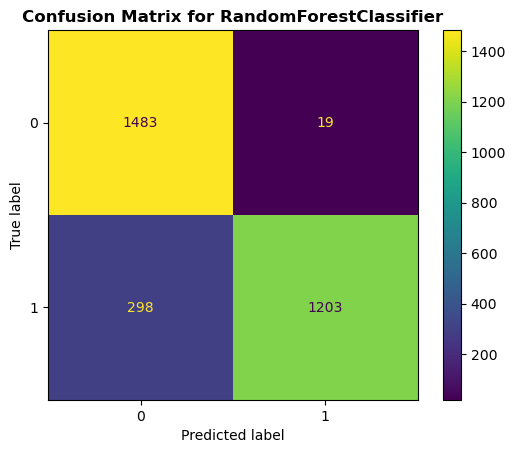

.......................................................


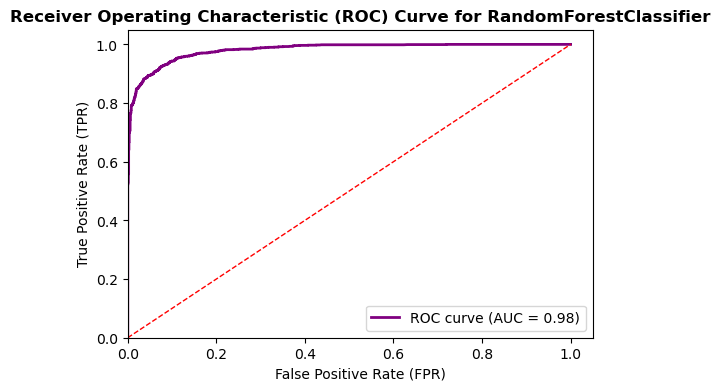

Note for AUC: A higher AUC indicates better performance.
.......................................................


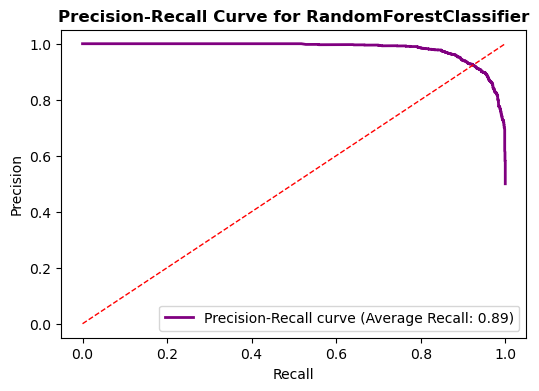

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [62]:
evaluate_model(tuned_rf, y_val_rf, y_val_pred_rf, y_val_prob_rf)

#### eXtreme Gradient Boost

<Figure size 500x500 with 0 Axes>

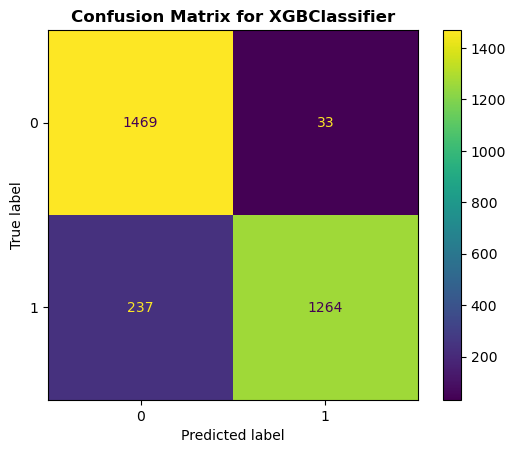

.......................................................


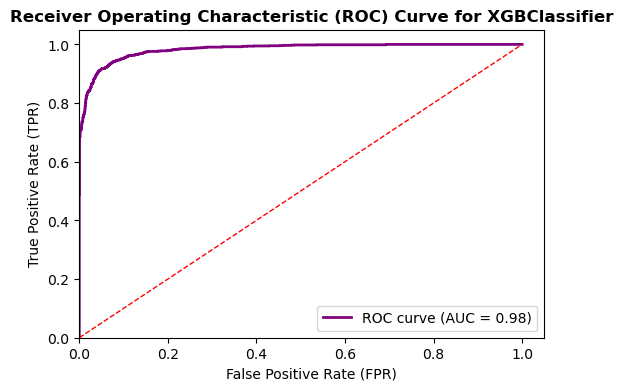

Note for AUC: A higher AUC indicates better performance.
.......................................................


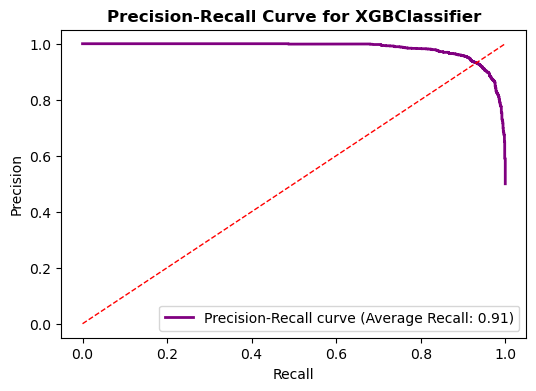

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [63]:
evaluate_model(tuned_xgb, y_val_xgb, y_val_pred_xgb, y_val_prob_xgb)

#### K-Nearest Neighbours (KNN)

<Figure size 500x500 with 0 Axes>

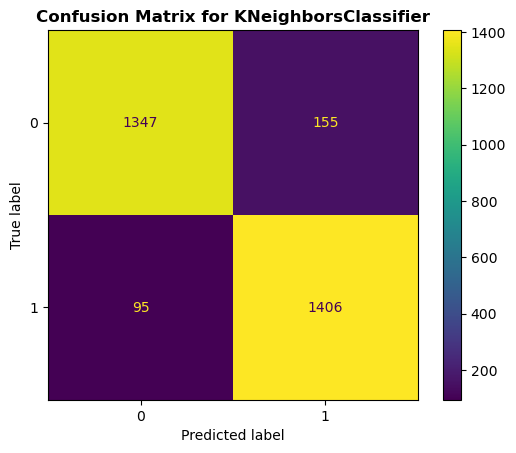

.......................................................


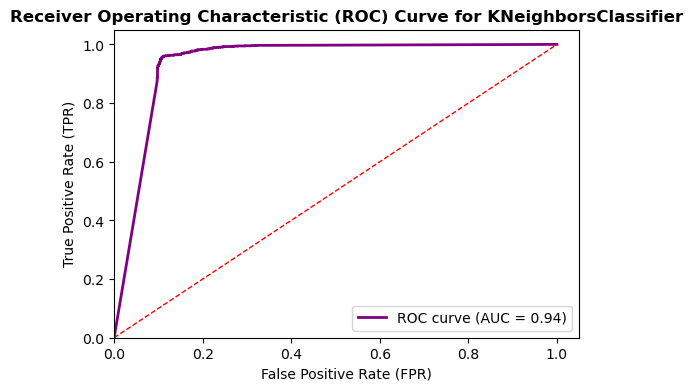

Note for AUC: A higher AUC indicates better performance.
.......................................................


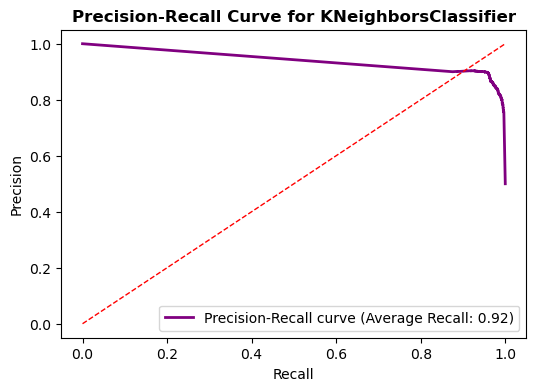

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [65]:
evaluate_model(tuned_knn, y_val_knn, y_val_pred_knn, y_val_prob_knn)

#### Visualizing Recall of the models

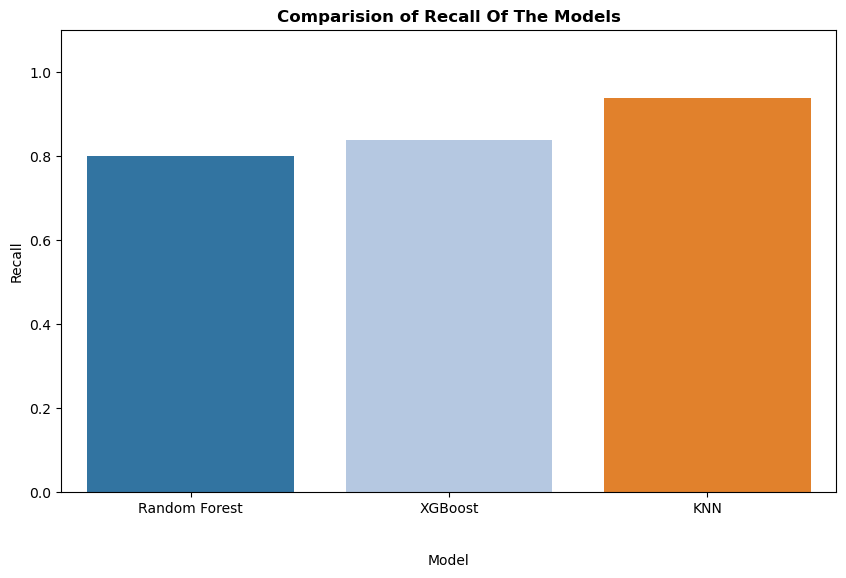

In [75]:
mod_labels = ['Random Forest', 'XGBoost', 'KNN']
rec = [0.80, 0.84, 0.94]

#Bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x = mod_labels, y = rec, hue = mod_labels)
plt.xlabel('\n\nModel')
plt.ylabel('Recall')
plt.ylim(0,1.1)
plt.title('Comparision of Recall Of The Models', fontweight='bold')
plt.show()

#### Observations:
- The Logistic Regression algorithm has performed poorly, which is expected as it's sensitive to outliers (hence I removed it from the analysis).
- The Random Forest Classifier, eXtreme Gradient Boost and K-Nearest Neighbours algorithms performed much better in comparison.
- Recall is an important metric here, and **the K-Nearest Neighbours has achieved the highest Recall score of 0.94.**

#### Next Step:
- Now, I'll evaluate the models over the test set.

# Stage 5: MODEL TESTING <a id="section-six"></a>
##### Objectives:
- Testing the selected model on test data
- Model Evaluation

#### Function for Model Evaluation

In [69]:
#Model evaluation
def evaluate_test_model(final_model, y_test, y_test_pred, y_test_prob):

    #Statistical Results for the test set
    print("TEST SET RESULTS:")
    print("." * 55)
    print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")
    print("." * 55)
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}")
    print(f"Precision: {metrics.precision_score(y_test, y_test_pred):.2f}")
    print(f"Recall: {metrics.recall_score(y_test, y_test_pred):.2f}")
    print(f"F1 Score (Harmonic mean of precision and recall): {metrics.f1_score(y_test, y_test_pred):.2f}")
    print("." * 55)
    print("\n")
    
    #Confusion Matrix for the test set
    cm = metrics.confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5,5))
    cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_plot.plot()
    plt.title(f'Confusion Matrix for {type(final_model).__name__} Classifier', fontweight='bold')
    plt.show()
    print("." * 55)
    print("\n")

    return None

#### Importing Test Sets

In [70]:
#Loading the saved test variables
with open('/Users/vedansh/Documents/Projects/Internship 1/Project 2/Saved Variables/X_test', 'rb') as file:
    X_test = pickle.load(file)

with open('/Users/vedansh/Documents/Projects/Internship 1/Project 2/Saved Variables/y_test', 'rb') as file:
    y_test = pickle.load(file)

#### Testing and evaluating the selected models

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.91      0.12      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.93      0.54    555719
weighted avg       1.00      0.95      0.97    555719

.......................................................
Accuracy: 0.95
Precision: 0.06
Recall: 0.91
F1 Score (Harmonic mean of precision and recall): 0.12
.......................................................




<Figure size 500x500 with 0 Axes>

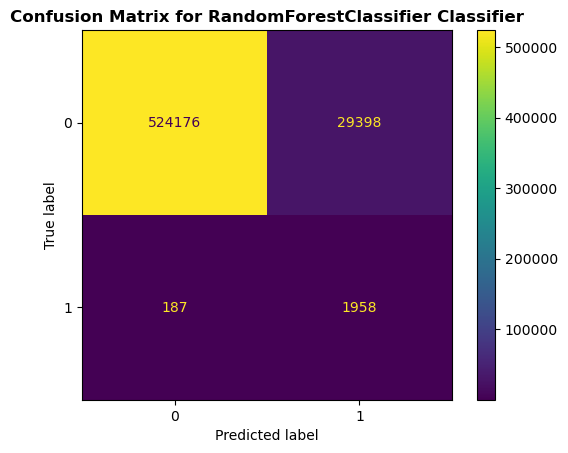

.......................................................




In [76]:
#Random Forest Classifier
y_test_pred_rf = tuned_rf.predict(X_test)
y_test_prob_rf = tuned_rf.predict_proba(X_test)[:, 1]
evaluate_test_model(tuned_rf, y_test, y_test_pred_rf, y_test_prob_rf)

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.89      0.10      2145

    accuracy                           0.94    555719
   macro avg       0.53      0.91      0.53    555719
weighted avg       1.00      0.94      0.96    555719

.......................................................
Accuracy: 0.94
Precision: 0.05
Recall: 0.89
F1 Score (Harmonic mean of precision and recall): 0.10
.......................................................




<Figure size 500x500 with 0 Axes>

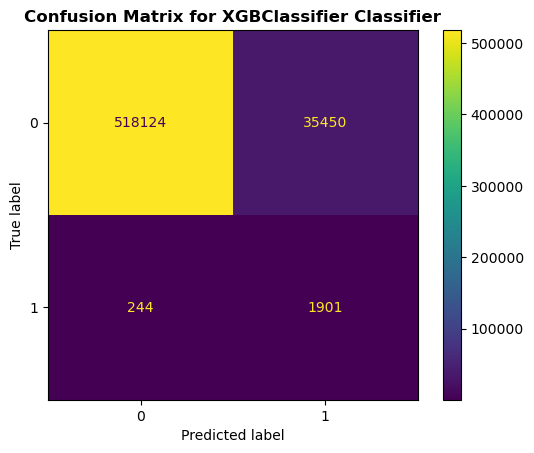

.......................................................




In [77]:
#XGB
y_test_pred_rf = tuned_xgb.predict(X_test)
y_test_prob_rf = tuned_xgb.predict_proba(X_test)[:, 1]
evaluate_test_model(tuned_xgb, y_test, y_test_pred_rf, y_test_prob_rf)

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    553574
           1       0.00      0.04      0.00      2145

    accuracy                           0.81    555719
   macro avg       0.50      0.43      0.45    555719
weighted avg       0.99      0.81      0.89    555719

.......................................................
Accuracy: 0.81
Precision: 0.00
Recall: 0.04
F1 Score (Harmonic mean of precision and recall): 0.00
.......................................................




<Figure size 500x500 with 0 Axes>

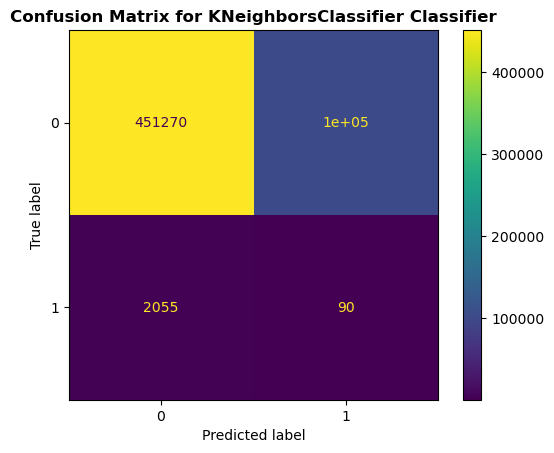

.......................................................




In [90]:
#KNN
y_test_pred_rf = tuned_knn.predict(X_test)
y_test_prob_rf = tuned_knn.predict_proba(X_test)[:, 1]
evaluate_test_model(tuned_knn, y_test, y_test_pred_rf, y_test_prob_rf)

#### Observation:
Among the three models, Random Forest performed the best on the Recall metric, scoring 0.91, while none have a good Precision score. I'll select Random Forest as the final model.

In [93]:
#Saving the final model
with open('final_model', 'wb') as file:
    pickle.dump(tuned_rf, file)

## CONCLUSION <a id="section-seven"></a>

##### In this research, I selected a labeled Credit Card fraud transactions dataset, which is quite scarce due to the extreme confidentiality of the information it might contain. I pre-processed the data, drew some insights, built functions for modeling and their evaluation, and then finally tested and exported the model. I drew the following conclusions through this research:
- A higher Recall is crucial in fraud detection to minimize the number of False Negatives or missed fraud cases since detecting fraudsters is a priority.
- A higher Recall indicates better sensitivity to detecting fraudulent transactions.
- Credit Card Fraud Detection 
Conducting a research project on credit card fraud detection is critical for financial institutions to protect theircustomers from fraudulent activities
- Among the models incorporated, **Random Forest Classifier appeared to generalize the most to unseen data and thus, outperforming the rest.**
- Preventing frauds and protecting customers is important to maintain the trust of any business or financial institution. As preventive technologies develop, so do the methods of fraudsters trying to deceive innocent people. We always need to be on the lookout and update our security to stop them.

- Some implications for fraud prevention strategies and customer protection include:
    - **Authentication Methods:** Implementing multi-factor authentication (MFA) and biometric verification adds layers of security, making it more difficult for fraudsters to gain unauthorized access. Also, using tokenization and encryption can safeguard sensitive customer data during transactions.
    - **Education and Awareness:** Educating customers about common fraud schemes, phishing attacks, and ways of protecting their personal information is essential.
    - **Regulatory Compliance:** Compliance with industry regulations is essential for protecting customer data and preventing fraud.
    - **Continuous Monitoring:** Conducting regular risk assessments helps identify vulnerabilities in existing systems and processes, allowing for timely mitigation measures to be implemented.
    - **Adaptation to Emerging Threats:** Fraudsters are constantly evolving their tactics, so fraud prevention strategies must also adapt accordingly.
 
#### Future Scope:
- Given the extremely unbalanced nature of this dataset, more data with a lesser severe class balance would greatly assist the models in learning the relationships and patterns in the data.